In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [126]:
df = pd.read_csv("sarima_practice.csv")
df.head()

,date,sales
0,2015-01-01,120
1,2015-02-01,128
2,2015-03-01,140
3,2015-04-01,155
4,2015-05-01,165


In [127]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [128]:
df

,sales
date,
2015-01-01,120
2015-02-01,128
2015-03-01,140
2015-04-01,155
2015-05-01,165
...,...
2020-08-01,208
2020-09-01,200
2020-10-01,195


<Axes: xlabel='date'>

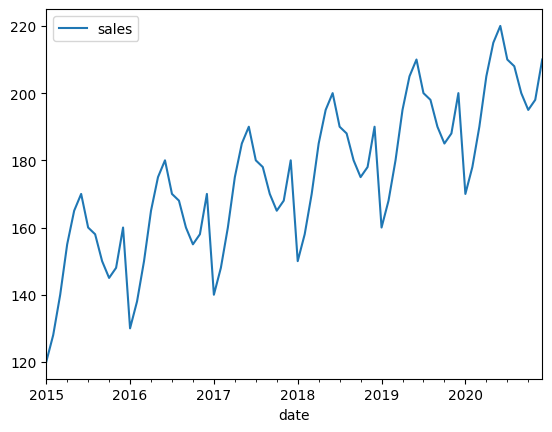

In [129]:
df.plot()

In [130]:
def test_stationary(series):
    p_value = adfuller(series)[1]
    if p_value<0.05 :
        print("stationary data")
    else:
        print("not stationary data")

In [131]:
test_stationary(df['sales'])
df['sales_non_seasonal_diff'] = df['sales'].diff()
df.dropna(inplace=True)
test_stationary(df['sales_non_seasonal_diff'])

not stationary data
stationary data


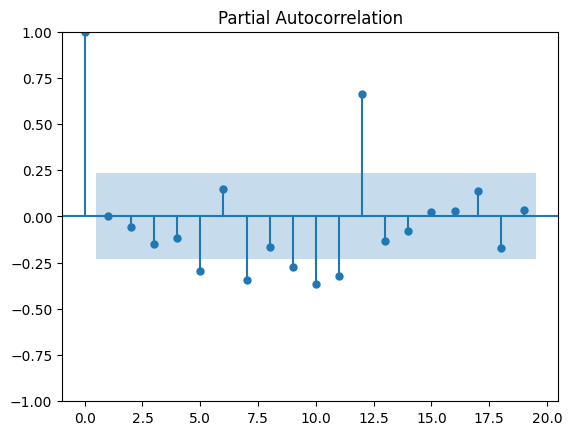

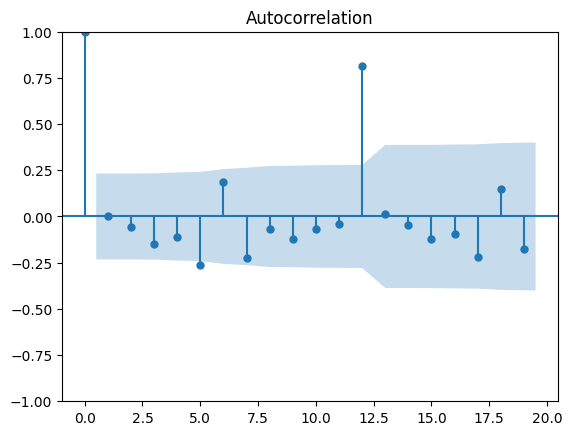

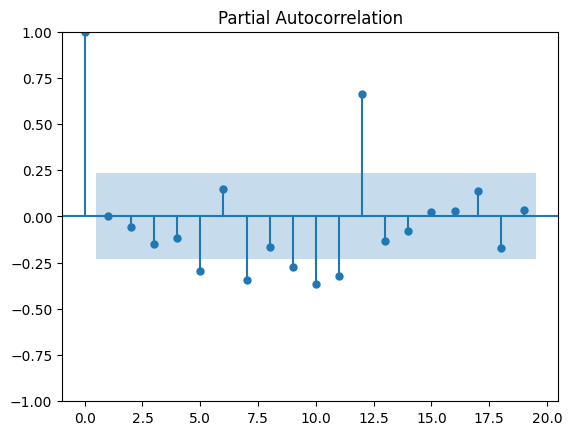

In [132]:
plot_acf(df['sales_non_seasonal_diff'])
plot_pacf(df['sales_non_seasonal_diff'])

In [133]:
#finding seasonality 

result = seasonal_decompose(df['sales'],model='multiplicative',period=12)

In [134]:
ss=result.seasonal.groupby(result.seasonal.index.month).mean()
ss

date
1     0.854880
2     0.896539
3     0.960554
4     1.040944
5     1.092403
6     1.115337
7     1.055751
8     1.040584
9     0.988660
10    0.954725
11    0.967511
12    1.032111
Name: seasonal, dtype: float64

In [135]:
df['seasonality_diff']=df['sales'].diff(12)
df=df.dropna()

In [136]:
df

,sales,sales_non_seasonal_diff,seasonality_diff
date,,,
2016-02-01,138,8.0,10.0
2016-03-01,150,12.0,10.0
2016-04-01,165,15.0,10.0
2016-05-01,175,10.0,10.0
2016-06-01,180,5.0,10.0
2016-07-01,170,-10.0,10.0
2016-08-01,168,-2.0,10.0
2016-09-01,160,-8.0,10.0
2016-10-01,155,-5.0,10.0


c:\anaconda\envs\secondenv\Lib\site-packages\statsmodels\tsa\stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\anaconda\envs\secondenv\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


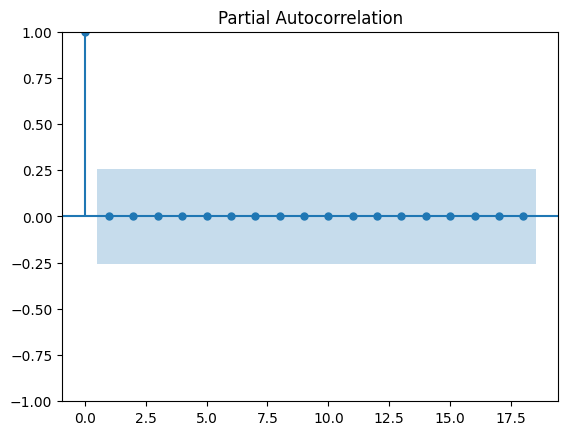

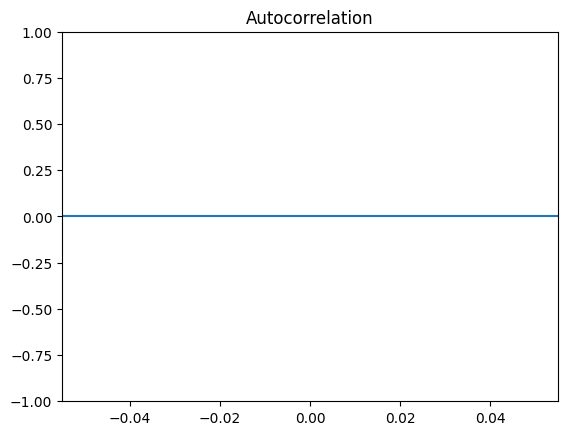

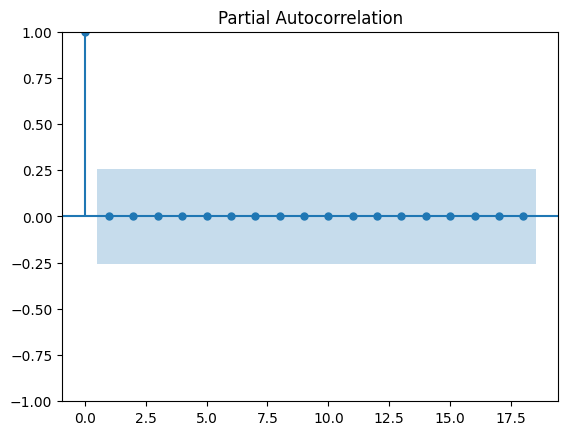

In [137]:
plot_acf(df['seasonality_diff'])
plot_pacf(df['seasonality_diff'])

In [138]:
train = df[:'2019-03-01']
test = df['2019-04-01':]



In [139]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

my_mod=model.fit()

c:\anaconda\envs\secondenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\anaconda\envs\secondenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\anaconda\envs\secondenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\anaconda\envs\secondenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [140]:
pred = my_mod.forecast(steps=len(test))

pred

2019-04-01    195.0
2019-05-01    205.0
2019-06-01    210.0
2019-07-01    200.0
2019-08-01    198.0
2019-09-01    190.0
2019-10-01    185.0
2019-11-01    188.0
2019-12-01    200.0
2020-01-01    170.0
2020-02-01    178.0
2020-03-01    190.0
2020-04-01    205.0
2020-05-01    215.0
2020-06-01    220.0
2020-07-01    210.0
2020-08-01    208.0
2020-09-01    200.0
2020-10-01    195.0
2020-11-01    198.0
2020-12-01    210.0
Freq: MS, Name: predicted_mean, dtype: float64

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mae = mean_absolute_error(test['sales'],pred)
msr = np.sqrt(mean_squared_error(test['sales'],pred))

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


mae = mean_absolute_error(test['sales'], pred)
rmse = np.sqrt(mean_squared_error(test['sales'], pred))
mape = np.mean(np.abs((test['sales'] - pred) / test['sales'])) * 100
r2 = r2_score(test['sales'], pred)


print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"MAE  (Mean Absolute Error):       {mae:.2f}")
print(f"RMSE (Root Mean Squared Error):   {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):     {mape:.2f}%")
print(f"R² Score:                          {r2:.4f}")
print("="*50)

if mape < 10:
    print(" Excellent forecast accuracy!")
elif mape < 20:
    print("✓ Good forecast accuracy")
elif mape < 30:
    print("⚠ Moderate forecast accuracy")
else:
    print("Poor forecast accuracy - consider model improvements")

MODEL PERFORMANCE METRICS
MAE  (Mean Absolute Error):       0.00
RMSE (Root Mean Squared Error):   0.00
MAPE (Mean Absolute % Error):     0.00%
R² Score:                          1.0000
 Excellent forecast accuracy!
